<a href="https://colab.research.google.com/github/ZeeshanAhmed95/Capstone-Data-Application-linear-regression/blob/main/Capstone_of_Final_Appliance_Energy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 

##### **Project Type**    - Regression
##### **Contribution**    - Team
##### **Team Member 1 -Zeeshan Ahmed**
##### **Team Member 2 -Akifuddin Kashif**

# **Project Summary -**

The capstone project Appiance Energy Prediction is about performing analysis on the data of energy used by the appliances in watt per hour collected for every 10 min from January to May. 

Currently there is an uncontrollable damage to the environment because of rapid consumption of natural resources of Earth. The increase of C02 is
rampant and the damage to the ozone layer is critical. The usage of
appliances in daily households also are contributing to the damage of Earth
and its environment. Tracking the usage and the amount of energy can be
very useful in curbing the problems by keeping the usage in control. We are
tasked with tracking the usage using supervised ML algorithms.

This project contains a data set which comprises of 29 columns among which we have a dependent variable called Appliances and 28 independent variables. It has a column Date, Temperature values of different rooms of a building from T1 to T9 and Tout in celsius. It also contains Humidity values of different rooms of a building from RH1 to RH9 and RHout in % . It has other columns like Pressure , Windspeed, Visibility, Tdewpoint in respective units mm Hg, m/s , Km,Â°C. Most of the column values are of float data type.

In this time of global uncertainty world needs energy and in increasing quantities to support economic and social progress and build a better quality of life, in particular in developing countries. But even in today’s time there are many places especially in developing world where there are outages. These outages are primary because of excess load consumed by appliances at home. Heating and cooling appliances takes most power in house. In this project we will be analysing the appliance usage in the house gathered via home sensors. All readings are taken at 10 mins intervals for 4.5 months . The goal is to predict energy consumption by appliances . In the age of smart homes, ability to predict energy consumption can not only save money for end user but can also help in generating money for user by giving excess energy back to Grid (in case of solar panels usage). In this case regression analysis will be used to predict Appliance energy usage based on data collected from various sensors.

In this project we loaded the dataset and we started by
extracting head and tail of the dataset to see the sample data and then came
extracting info of the dataset which tells the type of data present in different columns, the next step was producing description of data and checking the unique count of column values.We also checked for null values and created dummies for data which aren't numeric.We plotted relevant graphs to extract information from them. We also detected outliers in columns using Boxplots and
removed them.We also plotted correlation plots for numeric features to get additional information. We successfully performed EDA and produced conclusions on it. we also did feature engineering by creating a new variables called High cosumption and low consumption .First we created a Function called mean_energy_per_hour that takes the values of Appliance energy as input and calculates the mean of hour and Appliance values  .This segregates the values of Appliance Column into Low Consumption and High Consumption by taking the hour average of Appliance Usage as reference

Then we implemented supervised machine learning model(Regression) on our cleaned data set.We calculated the Variation Inflation Factor(VIF) scores of all the columns and dropped the columns which had VIF score greater than 10. This really helped us in removing the collinearity of the columns and making it desirable for modelling. We used models like Linear Regression, Lasso Regression, Ridge Regression, Decision Trees, Random Forest, XGBoost ,Extra trees regression models. Random Forest, Extra Trees are the ensembles of decision trees. We evaluated these models on basis of R2 score .

# **GitHub Link -**https://github.com/ZeeshanAhmed95/Capstone-Data-Application-linear-regression

# **Problem Statement**

Data-driven prediction of energy use of appliances
The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions
were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the
temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for
10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters.
Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded
from a public data set from Reliable Prognosis (rp5.ru) and merged together with the
experimental data sets using the date and time column. Two random variables have been
included in the data set for testing the regression models and to filter out non-predictive attributes
(parameters).

date time year-month-day hour:minute:second

Appliances, energy use in Wh (Dependent variable)

lights, energy use of light fixtures in the house in Wh (Drop this column)

T1, Temperature in kitchen area, in Celsius

RH1, Humidity in kitchen area, in % T2, Temperature in living room area, in Celsius

RH2,Humidity in living room area, in %

T3, Temperature in laundry room area

RH3, Humidity in laundry room area, in % T4, Temperature in office room, in 
Celsius 

RH4,Humidity in office room, in %

T5, Temperature in bathroom, in Celsius

RH5, Humidity in bathroom, in % T6, Temperature outside the building (north side), in Celsius

RH6, Humidity outside the building (north side), in %

T7, Temperature in ironing room , in Celsius

RH7, Humidity in ironing room, in % T8, Temperature in teenager room 2, in Celsius

RH8,Humidity in teenager room 2, in %

T9, Temperature in parents room, in Celsius

RH9, Humidity in parents room, in % To, Temperature outside (from Chievres weather station), in Celsius

Pressure (from Chievres weather station), in mm Hg RHout, Humidity outside (from
Chievres weather station), in %

Wind speed (from Chievres weather station), in m/s

Visibility (from Chievres weather station), in km

Tdewpoint (from Chievres weather station), Â°C

rv1, Random variable 1, nondimensional

rv2, Random variable 2, nondimensional

Where indicated, hourly data (then interpolated) from the nearest airport weather station(Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis,rp5.ru. Permission was obtained from Reliable Prognosis for the distribution of the 4.5 months of
weather data.

## ***1. Know Your Data***

### Import Libraries

In [1]:

#Importing Necessary Libraries
import numpy as np
import pandas as pd
from numpy import math
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import matplotlib.pyplot as plt                        # visualize with plots
%matplotlib inline
import warnings
import seaborn as sns
plt.style.use('seaborn-white')
import plotly.express as px  
from datetime import datetime 
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.metrics import accuracy_score, auc
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score


# **DATA LOADING**

In [2]:
# Importing Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [3]:
# Reading the dataset which is in csv.
df = pd.read_csv('/content/drive/MyDrive/data_application_energy.csv',parse_dates=['date'])

# **DATA UNDERSTANDING**

### Dataset First View

In [ ]:
#Visualizing the dataset
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
# extracting tail of the dataset
df.tail()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,...,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,...,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,...,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,...,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
19734,2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,...,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


### Dataset Rows & Columns count

In [ ]:
#The shape of the dataset i.e, number of rows and columns   
df.shape

(19735, 32)

### Dataset Information

In [ ]:
#Checking the datatype of the column values and non-null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

#### Duplicate Values

In [4]:
# getting duplicates
Dublicates=df[df.duplicated()]
print(f'The Dublicate Values in Dataframe: ')
Dublicates

The Dublicate Values in Dataframe: 


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2


### There are no duplicates in our dataset

# **DATA CLEAN UP**

#### Missing Values/Null Values

In [ ]:
#Checking if there are null values or not and their sum for each column
df.isna().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
month          0
hour           0
week           0
weekday        0
hour_avg       0
low_consum     0
high_consum    0
dtype: int64

#### This result shows there are no null values 

### What did you know about your dataset?

## ***2. Understanding Your Variables***

In [ ]:
#Checking the names of all columns of the dataset
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [ ]:
#Checking the description of the dataset
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,month,hour,week,weekday
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033,3.101647,11.502002,11.393615,2.977249
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634,1.339200,6.921953,5.657985,1.985617
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322,1.000000,0.000000,2.000000,0.000000
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889,2.000000,6.000000,6.000000,1.000000
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653,3.000000,12.000000,11.000000,3.000000
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769,4.000000,17.000000,16.000000,5.000000
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530,5.000000,23.000000,21.000000,6.000000


### Variables Description 

date : time year-month-day hour:minute:second

Appliances : energy use in Wh (Dependent variable)

lights : energy use of light fixtures in the house in Wh (Drop this column)

T1 : Temperature in kitchen area, in Celsius

RH1 : Humidity in kitchen area, in %

T2 : Temperature in living room area, in Celsius

RH2 : Humidity in living room area, in %

T3 : Temperature in laundry room area

RH3 : Humidity in laundry room area, in % 

T4 : Temperature in office room, in Celsius 

RH4 : Humidity in office room, in %

T5 : Temperature in bathroom, in Celsius

RH5: Humidity in bathroom, in % 

T6 : Temperature outside the building (north side), in Celsius

RH6 : Humidity outside the building (north side), in %

T7 : Temperature in ironing room , in Celsius

RH7 : Humidity in ironing room, in %

T8 : Temperature in teenager room 2, in Celsius

RH8 : Humidity in teenager room 2, in %

T9 : Temperature in parents room, in Celsius

RH9 : Humidity in parents room, in % 

To : Temperature outside (from Chievres weather station), in Celsius

Pressure : (from Chievres weather station), in mm Hg

RHout : Humidity outside (from Chievres weather station),in %

Wind speed : (from Chievres weather station), in m/s

Visibility : (from Chievres weather station), in km

Tdewpoint : (from Chievres weather station), Â°C

rv1 : Random variable 1, nondimensional

rv2 : Random variable 2, nondimensional

### Check Unique Values for each variable.

In [5]:
# getting number of unique values for each column
df.nunique()

date           19735
Appliances        92
lights             8
T1               722
RH_1            2547
T2              1650
RH_2            3376
T3              1426
RH_3            2618
T4              1390
RH_4            2987
T5              2263
RH_5            7571
T6              4446
RH_6            9709
T7              1955
RH_7            5891
T8              2228
RH_8            6649
T9               924
RH_9            3388
T_out           1730
Press_mm_hg     2189
RH_out           566
Windspeed        189
Visibility       413
Tdewpoint       1409
rv1            19735
rv2            19735
dtype: int64

## 3. ***Data Wrangling***

The number of the 0,1% top values of appliances' load is 19 and they have power load higher than 140 Wh.


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



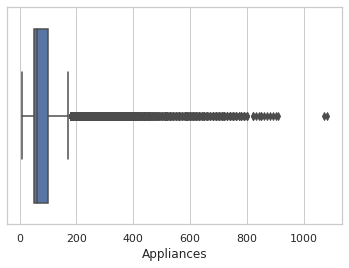

In [ ]:

# Find outliers
sorted_appliances = df1.sort_values('Appliances',ascending=False)
print("The number of the 0,1% top values of appliances' load is",
      len(sorted_appliances.head(len(sorted_appliances)//1000)),"and they have power load higher than",
      sorted_appliances.Appliances[19], "Wh.")

# boxplot appliances
sns.set(style="whitegrid")
ax = sns.boxplot(sorted_appliances.Appliances)

In [7]:

# Outliers removal

df1 = df.dropna()
df1 = df.drop(df[(df.Appliances>140)|(df.Appliances<0)].index)

In [8]:
#Checking whether the date column is in datatime format or not
type(df['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [9]:
#Extracting the months, hours and weeks from the date column by setting it as index
df = df.set_index('date')
df['month'] = df.index.month
df['hour'] = df.index.hour
df['week'] = df.index.week
df['weekday'] = df.index.weekday

<ipython-input-9-ce872152c8b1>:5: FutureWarning:

weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)



##       **Feature** **Engineering**

In [10]:
# Resetting the index and the date returns back to being a column
df.reset_index(inplace = True)

In [11]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,month,hour,week,weekday
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,92.0,7.000000,63.000000,5.3,13.275433,13.275433,1,17,2,0
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,92.0,6.666667,59.166667,5.2,18.606195,18.606195,1,17,2,0
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,92.0,6.333333,55.333333,5.1,28.642668,28.642668,1,17,2,0
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,92.0,6.000000,51.500000,5.0,45.410389,45.410389,1,17,2,0
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,92.0,5.666667,47.666667,4.9,10.084097,10.084097,1,17,2,0


In [12]:
# Creating a new feature
# Calculate average energy load per hour
def mean_energy_per_hour(df, hour_feature, energy_feature):
    """
    Returns a dictionary where keys are unique categories of the cat_feature,
    and values are means over real_feature
    """
    return dict(df.groupby(hour_feature)[energy_feature].mean())

In [13]:
df['hour_avg'] = list(map(mean_energy_per_hour(df[:], 'hour', "Appliances").get, df.hour)) #Calculating amount energy used per hour

In [14]:
# categorizing them as low and high according their values
df['low_consum'] = (df.Appliances+25<(df.hour_avg))*1
df['high_consum'] = (df.Appliances+100>(df.hour_avg))*1

***We assume that we have low(high) energy load when the appliances consumption is lower(higher) than a given point of the hourly average counsumption. This point is dependent of date time frequency and the numbers below are set after several tryouts based on appliances' consumption standard deviation.***

### What all manipulations have you done and insights you found?

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## Chart - 1

In [ ]:
# Finding out how many unique months are there
df['month'].unique()

array([1, 2, 3, 4, 5])

In [ ]:
values = list(df['hour_avg'].unique())
values

[161.35265700483092,
 190.36452004860269,
 143.06569343065692,
 126.98296836982968,
 96.4963503649635,
 69.14841849148418,
 56.982968369829685,
 52.78588807785888,
 51.32603406326034,
 49.07542579075426,
 48.236009732360095,
 49.35523114355231,
 52.737226277372265,
 57.71289537712895,
 78.64963503649635,
 106.14355231143553,
 112.78588807785889,
 125.37712895377129,
 133.12652068126522,
 123.63746958637469,
 124.74452554744525,
 108.28467153284672,
 105.82725060827251,
 119.90267639902676]

In [ ]:
names = []
for i in range(24):
  names.append(str(i))

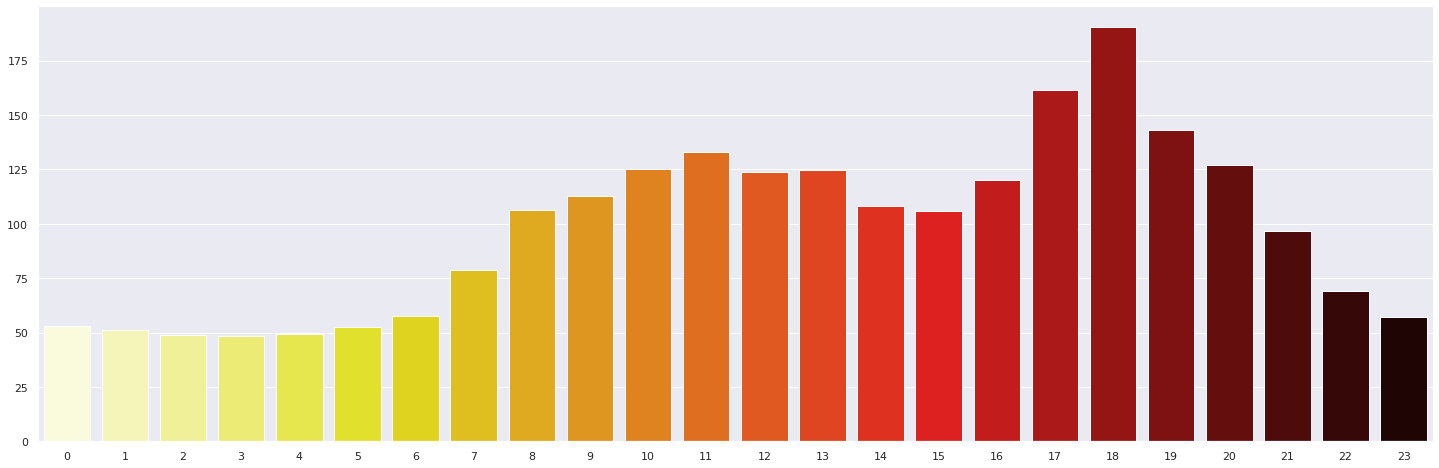

In [ ]:
sns.set(rc={'figure.figsize':(25,8)})
sns.barplot(x = names, y =  values, palette = 'hot_r')

#### 1. Why did you pick the specific chart?

#### 2. What is/are the insight(s) found from the chart?

##### Checking the variations of temperatures among all the rooms of the building

#### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

## Chart - 2

In [ ]:
# assigning values to variables for plots
T1 = df['T1'].values.mean()
T2 = df['T2'].values.mean()
T3 = df['T3'].values.mean()
T4 = df['T4'].values.mean()
T5 = df['T5'].values.mean()
T7 = df['T7'].values.mean()
T8 = df['T8'].values.mean()
T9 = df['T9'].values.mean()
# We have not included the temps T6 and T_out as they are the temps from outside.

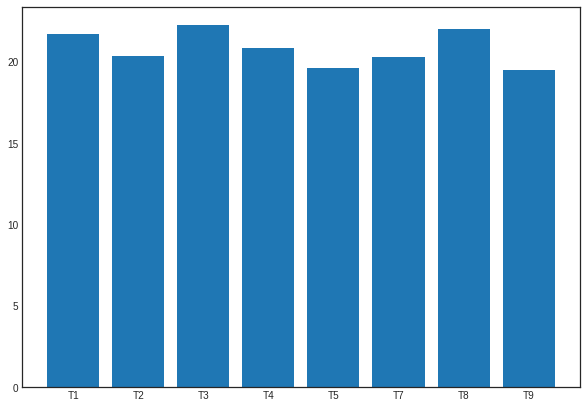

In [ ]:

# Figure Size
fig = plt.figure(figsize =(10, 7))
values = [T1,T2,T3,T4,T5,T7,T8,T9]
names = ['T1','T2','T3','T4','T5','T7','T8','T9']
# Horizontal Bar Plot
plt.bar(names, values)
 
# Show Plot
plt.show()

#### 1. Why did you pick the specific chart?

#### 2. What is/are the insight(s) found from the chart?

#####The warmest temperatures are  laundry room(T3), teenager room(T8) and kitchen area(T1) respectively. And the coldest rooms are bathroom(T5) and parents room(T9).

#### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

# Checking the energy variations with respect to temperatures outside the building

## Chart - 3

In [ ]:
# assigning values to variables for plots
T6 = df['T6'].values
T_out = df['T_out'].values
Appliance_energy = df['Appliances'].values

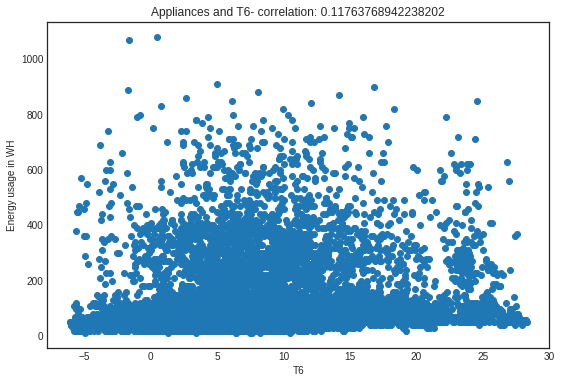

In [ ]:
#scatter plot of Temperature vs Energy usage
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
feature = df['T6']
label = df['Appliances']
correlation = feature.corr(label)
plt.scatter(x=feature, y=label)
plt.xlabel('T6')
plt.ylabel('Energy usage in WH')
ax.set_title('Appliances and' + ' T6' + '- correlation: ' + str(correlation))


plt.show()

#### 1. Why did you pick the specific chart?

#### 2. What is/are the insight(s) found from the chart?

##### The correlation is minute but it exists between energy use and temperature northside of the building. The energy usage stays consistent from temperatures 5° to 25°. At extreme high and low temperatures, the energy usage is relatively low.

#### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

## Chart - 4

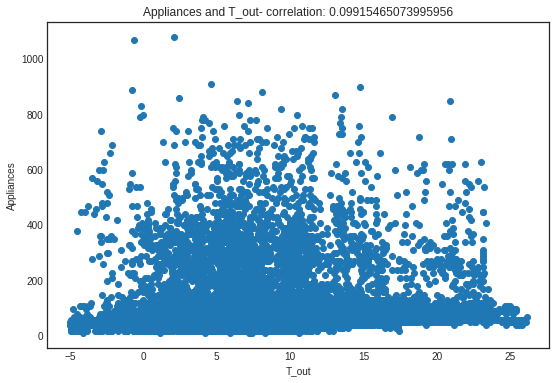

In [ ]:
#scatter plot of Temperature vs Energy usage
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
feature = df['T_out']
label = df['Appliances']
correlation = feature.corr(label)
plt.scatter(x=feature, y=label)
plt.xlabel('T_out')
plt.ylabel('Appliances')
ax.set_title('Appliances and' +' T_out' + '- correlation: ' + str(correlation))


plt.show()

#### 1. Why did you pick the specific chart?

#### 2. What is/are the insight(s) found from the chart?

##### There is little correlation between temperatures in neighbourhood and energy usage. There is an acute drop at extreme highs and lows in temperature.

#### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

# Variations in Energy consumption with respect to Pressure

## Chart - 5

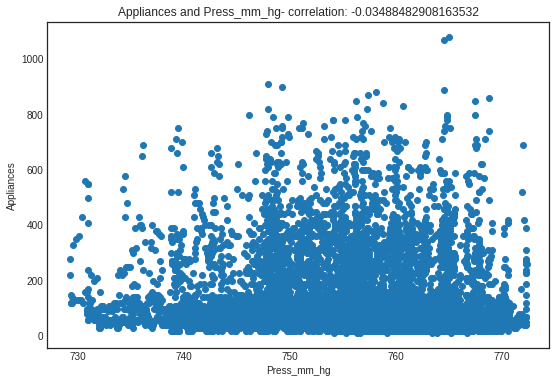

In [ ]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
feature = df['Press_mm_hg']
label = df['Appliances']
correlation = feature.corr(label)
plt.scatter(x=feature, y=label)
plt.xlabel('Press_mm_hg')
plt.ylabel('Appliances')
ax.set_title('Appliances and' + ' Press_mm_hg' + '- correlation: ' + str(correlation))


plt.show()

#### 1. Why did you pick the specific chart?

#### 2. What is/are the insight(s) found from the chart?

##### There is little to  no correlation between pressure and energy consumption.

#### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

# Energy variation with respect to humidity in different rooms of building.

## Chart - 6

In [ ]:
# assigning values to variables for plots
RH1 = df['RH_1'].values.mean()
RH2 = df['RH_2'].values.mean()
RH3 = df['RH_3'].values.mean()
RH4 = df['RH_4'].values.mean()
RH5 = df['RH_5'].values.mean()
RH6 = df['RH_6'].values.mean()
RH7 = df['RH_7'].values.mean()
RH8 = df['RH_8'].values.mean()
RH9 = df['RH_9'].values.mean()
RH_out = df['RH_out'].values.mean()

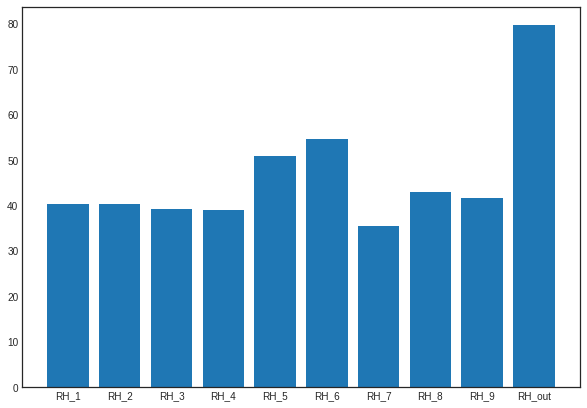

In [ ]:
# Figure Size
fig = plt.figure(figsize =(10, 7))
values = [RH1,RH2,RH3,RH4,RH5,RH6,RH7,RH8,RH9,RH_out]
names = ['RH_1','RH_2','RH_3','RH_4','RH_5','RH_6','RH_7','RH_8','RH_9','RH_out']
# Horizontal Bar Plot
plt.bar(names, values)
 
# Show Plot
plt.show()

#### 1. Why did you pick the specific chart?

#### 2. What is/are the insight(s) found from the chart?

##### The humidity is at its highest outside the building(RH_out) and lowest in the ironing room(RH_7).

#### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

## Chart - 7

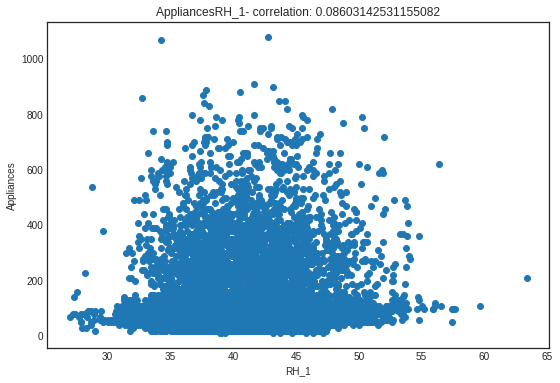

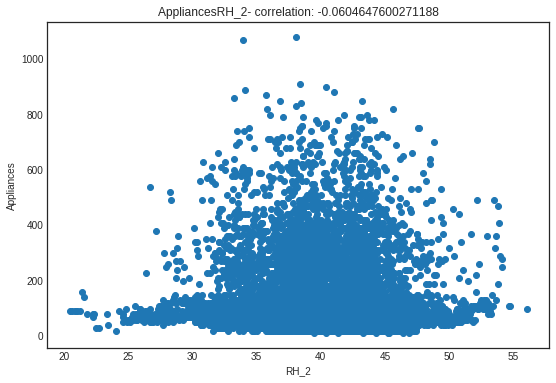

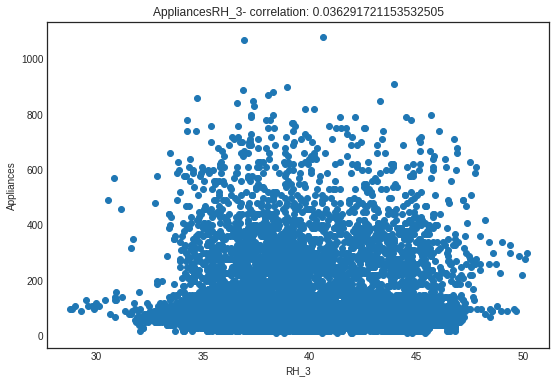

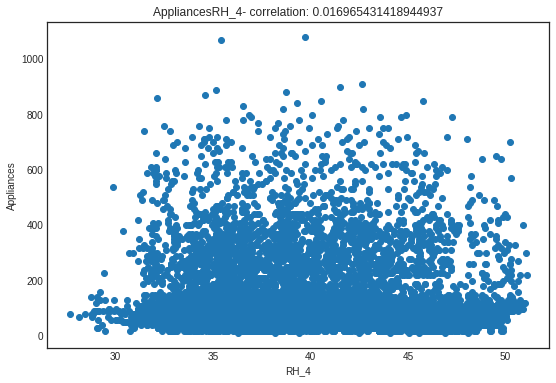

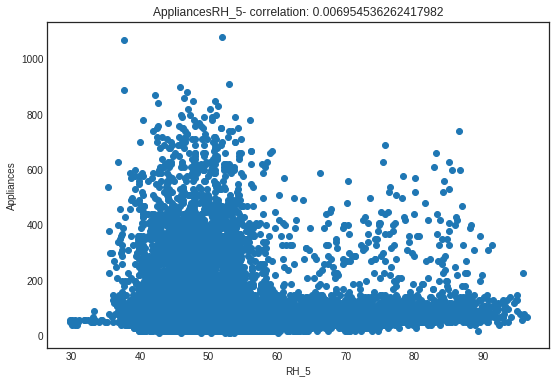

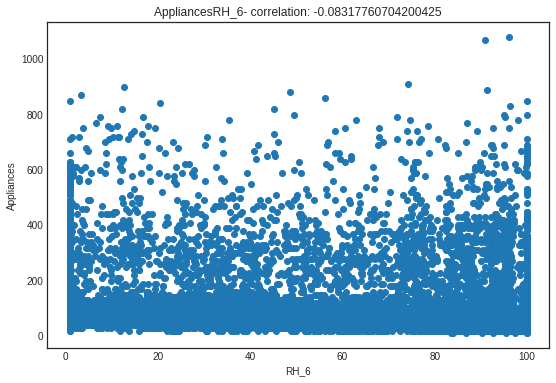

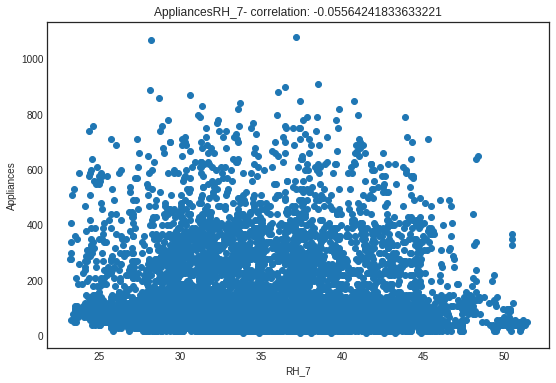

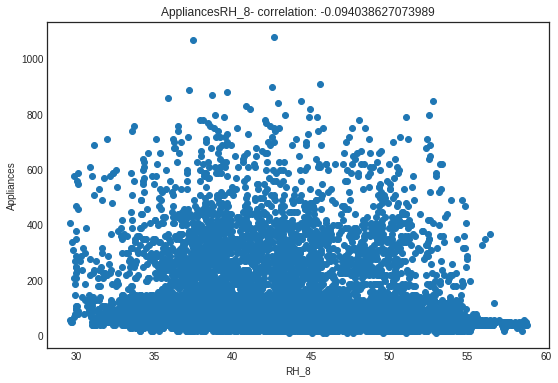

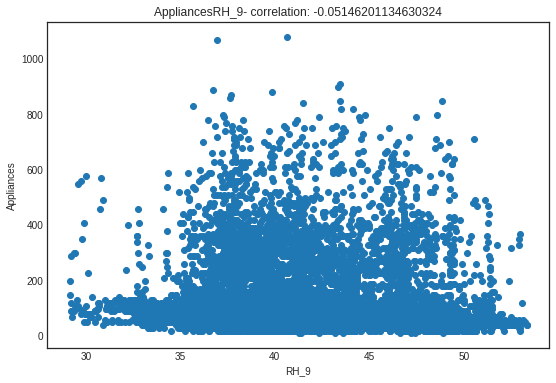

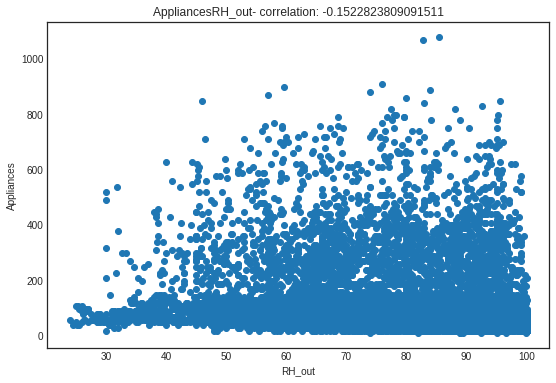

In [ ]:


# obtaining correlation plots between humidity values and energy comsumption.
for i in names:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[i]
    label = df['Appliances']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(i)
    plt.ylabel('Appliances')
    ax.set_title('Appliances' + i + '- correlation: ' + str(correlation))

plt.show()


#### 1. Why did you pick the specific chart?

#### 2. What is/are the insight(s) found from the chart?

All the scatterplots between humidity among different rooms of the building and energy cosumption.

1.Humidity in kitchen area shows a normal distribution w.r.t energy consumption.Little to no consumption after humidity reaches >50.

2.Very low energy consumption for humidity levels of 20 to 30 in the living room with sudden increase to adjacent levels of humidity.

3.Humidty in laundry room influences the energy consumption similar to that of living room.

4.Little to no contribution from humidity levels of office room towards energy consumption.

5.No influence by humidity levels of bathroom towards energy consumption.

6.Energy consumption may be inversely correlated to the humidity levels of northside outside of the building.

7.Energy consumption is highly inversely correlated to  humidity levels of neighbourhood of the building.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

## Chart - 8

In [ ]:
#Making a copy of the original dataset for futhur analysis
df1 = df.copy()

In [ ]:
#Converting month number to month name
import calendar
df1['month'] = df1['month'].apply(lambda x: calendar.month_abbr[x])

In [ ]:
df1['month'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May'], dtype=object)

# The data has been collected from months January to May

In [ ]:
#Creating a dataframe with respect to the month column's sum
df_month = df1.groupby('month').sum()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f66baaad520>],
      dtype=object)

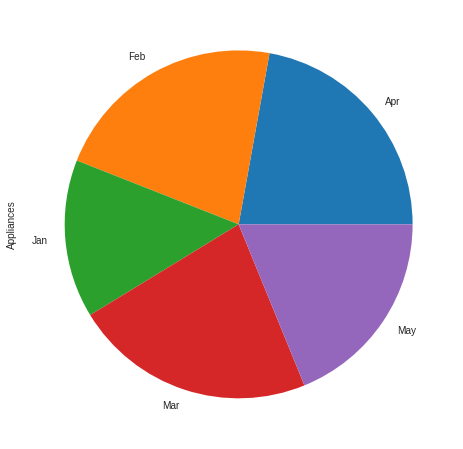

In [ ]:
# Pie chart of dataframe of month versus Appliances column
df_month['Appliances'].plot(kind='pie', subplots=True, figsize=(8, 8))

#### 1. Why did you pick the specific chart?

#### 2. What is/are the insight(s) found from the chart?



##### From this Pie chart we can observe that in Feb, Mar, April, the usage of appliances is more or less equal and that of Jan was the lowest one

#### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

## Chart - 9

In [15]:
# Average energy consumption per weekday and hour
df['weekday_avg'] = list(map(
    mean_energy_per_hour(df[:], 'weekday', "Appliances").get, df.weekday))
df['hour_avg'] = list(map(
    mean_energy_per_hour(df[:], 'hour', "Appliances").get, df.hour))

# HYPOTHESIS : **Appliance usage on weekends is more than weekdays.**
**Null Hypothesis** : No, Weekends have no effect on appliance usage.

**Alternate Hypothesis** : Yes, Weekends do have an influence on appliance usage.

In [16]:
# Functions to be used from the plots

def daily(x,df=df):
    return df.groupby('weekday')[x].mean()
def hourly(x,df=df):
    return df.groupby('hour')[x].mean()

def monthly_daily(x,df=df):
    by_day = df.pivot_table(index='weekday', 
                                columns=['month'],
                                values=x,
                                aggfunc='mean')
    return round(by_day, ndigits=2)

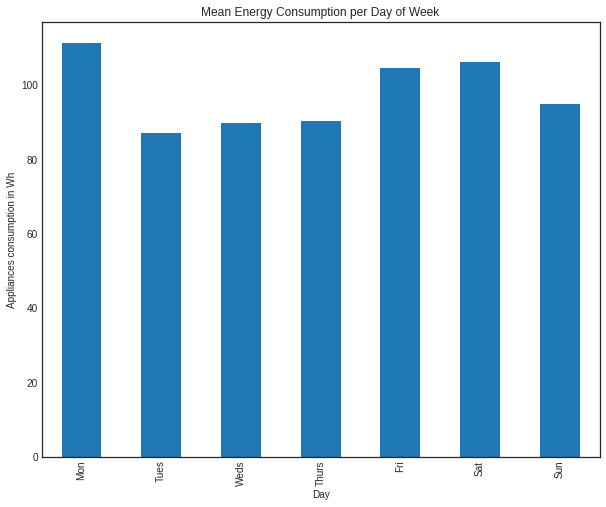

In [17]:
# Plot of Mean Energy Consumption per Day of Week

daily('Appliances').plot(kind = 'bar', figsize=(10,8))
ticks = list(range(0, 7, 1)) 
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xlabel('Day')
plt.ylabel('Appliances consumption in Wh')
plt.title('Mean Energy Consumption per Day of Week')
plt.xticks(ticks, labels);

#### 1. Why did you pick the specific chart?

#### 2. What is/are the insight(s) found from the chart?

##### Energy Usage was obeserved to be at its peak on Monday and it was it's lowest on Tuesday. There was high usage of Appliances on weekend i.e Friday, Saturday, Sunday than compared to weekdays. so, we reject the null hypothesis.

#### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

## Chart - 10

In [ ]:
#Checking if all the hours of a day are considered or not
df1['hour'].unique()

array([17, 18, 19, 20, 21, 22, 23,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 11, 12, 13, 14, 15, 16])

In [ ]:
#Creating another dataframe with respect to the hour column's sum
df_hourly = df1.groupby('hour').sum()['Appliances']

In [ ]:
df_hourly.head()

hour
0    43390
1    42190
2    40340
3    39650
4    40570
Name: Appliances, dtype: int64

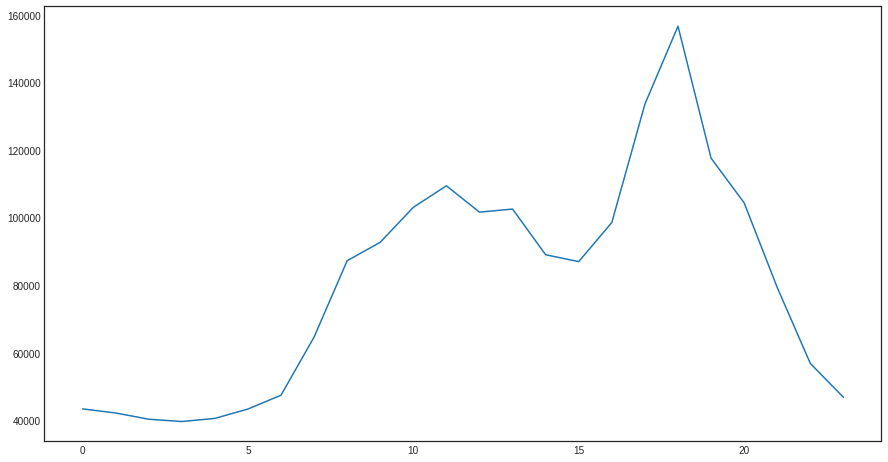

In [ ]:
# Line plot of hour vs Appliances(hour is on X-axis)
plt.figure(figsize=(15,8))
plt.plot(df_hourly)
plt.show()

#### 1. Why did you pick the specific chart?

#### 2. What is/are the insight(s) found from the chart?

##### From this line plot, the usage of appliances is a steady rise starting from 12 am and hits peak aroud 18th hour of the day. Then, after hitting its peak it takes a sudden dip starting from 21ist hour. The underlying reason might be because its night time and people probably will be less active.

#### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

## Chart - 11

In [ ]:
#Checking the unique values of the week column
df1['week'].unique()

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21])

***The data has been collected for 20 weeks starting from Jan 1 to May 27.***

In [ ]:
##Creating another dataframe with respect to the week column's sum
df_weekly = df.groupby('week').sum()['Appliances']

In [ ]:
df_weekly.head()

week
2    110490
3     96960
4     76060
5     99680
6    114070
Name: Appliances, dtype: int64

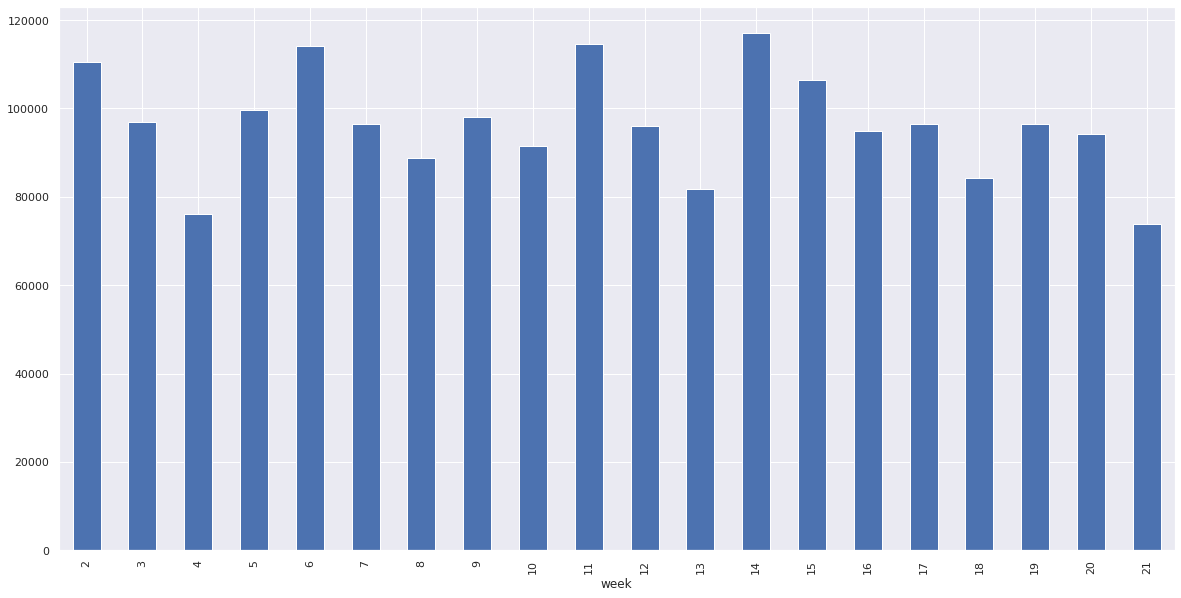

In [ ]:
#Bar plot which shows the usage of appliances in a week
fig, ax = plt.subplots(figsize=(20,10))
df_weekly.plot(kind='bar', ax=ax)

#### 1. Why did you pick the specific chart?

#### 2. What is/are the insight(s) found from the chart?

##### This bar plot shows that at week 14 i.e, the second week of April, the usage of appliances is the highest and on the other hand, its lowest in the last week of the period i.e, the fourth week of May.

#### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

## Chart - 12

In [ ]:
#Extracting the year from the date column
year = []
for i in range(len(df['date'])):
  year.append(df['date'][i].year)
df['year'] = year  

In [ ]:
df['year'].unique()

array([2016])

# This data collection was collected in the year 2016

In [ ]:
df2 = df1.copy()

In [ ]:
# Dropping the month, week,year column as we are done with EDA
df2.drop(columns = (['month', 'week', 'year']), inplace = True)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17293 entries, 0 to 19731
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         17293 non-null  datetime64[ns]
 1   Appliances   17293 non-null  int64         
 2   lights       17293 non-null  int64         
 3   T1           17293 non-null  float64       
 4   RH_1         17293 non-null  float64       
 5   T2           17293 non-null  float64       
 6   RH_2         17293 non-null  float64       
 7   T3           17293 non-null  float64       
 8   RH_3         17293 non-null  float64       
 9   T4           17293 non-null  float64       
 10  RH_4         17293 non-null  float64       
 11  T5           17293 non-null  float64       
 12  RH_5         17293 non-null  float64       
 13  T6           17293 non-null  float64       
 14  RH_6         17293 non-null  float64       
 15  T7           17293 non-null  float64       
 16  RH_7

***All columns are of desirable data type***

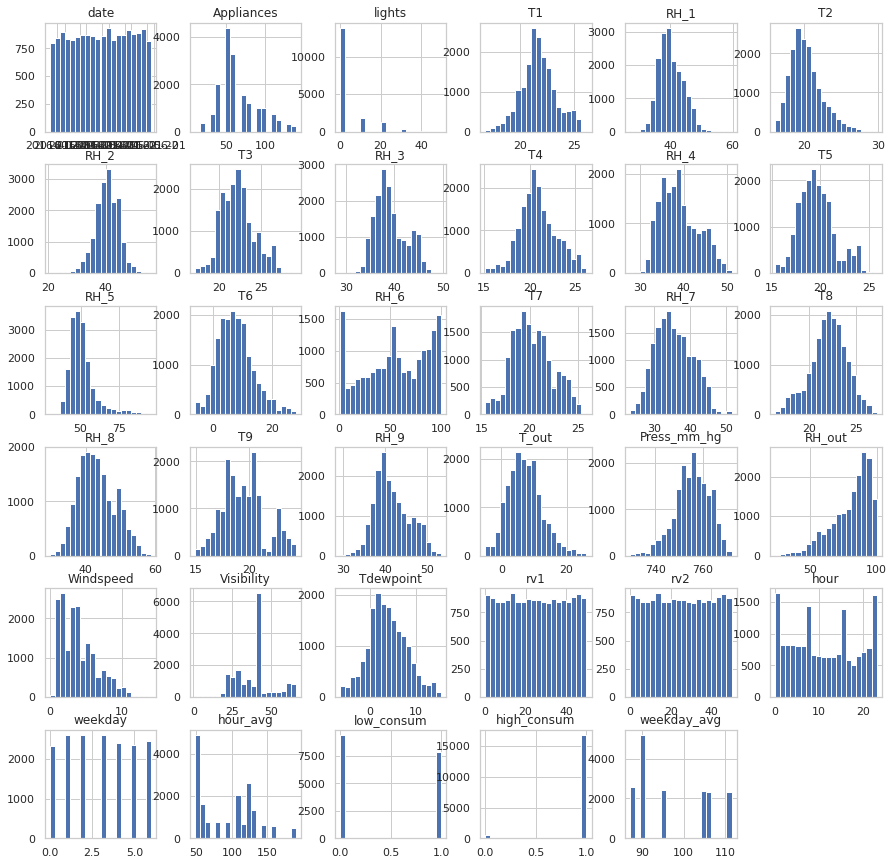

In [ ]:
# Histogram of all the features to understand the distribution
df2.hist(bins = 20 , figsize= (15,15 )) ;


#### 1. Why did you pick the specific chart?

#### 2. What is/are the insight(s) found from the chart?

#### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

## Chart - 14 - Correlation Heatmap

<ipython-input-137-bceb2c06ec1f>:5: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

<ipython-input-137-bceb2c06ec1f>:5: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

<ipython-input-137-bceb2c06ec1f>:5: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

<ipython-input-137-bceb2c06ec1f>:5: RuntimeWarning:

More than 20 figures have 

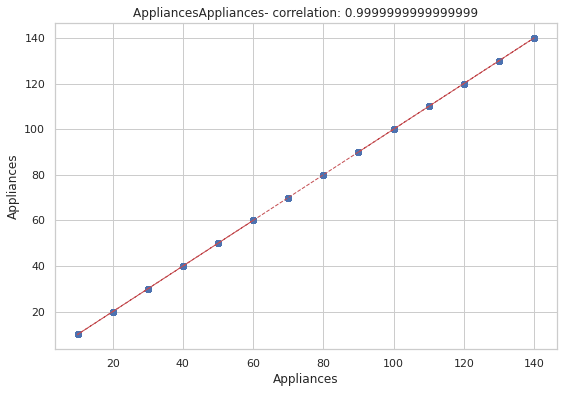

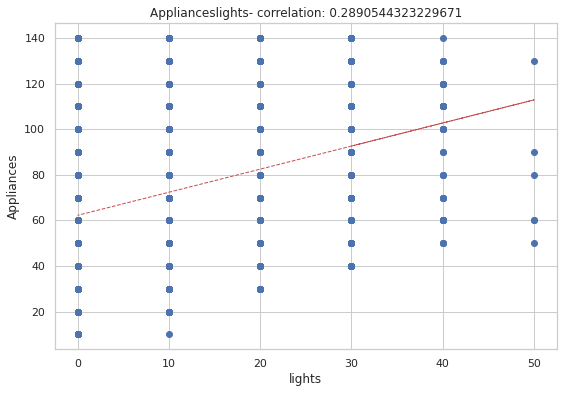

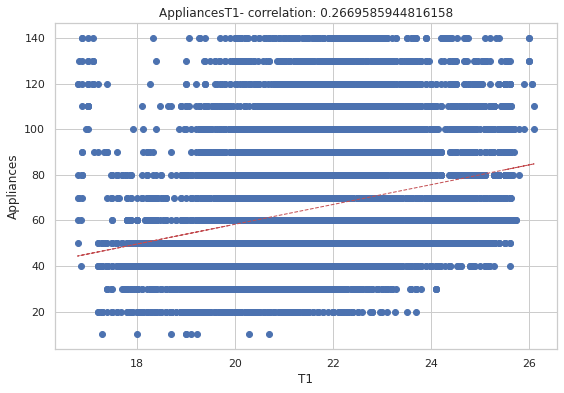

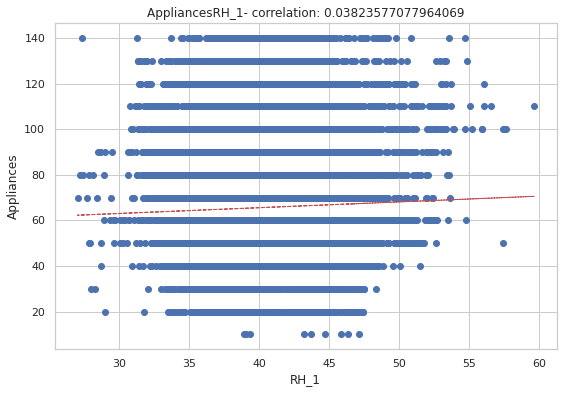

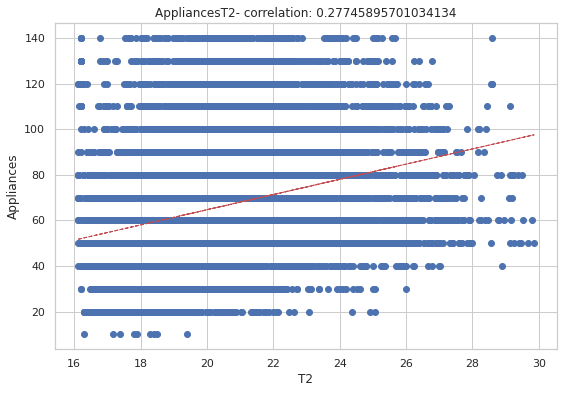

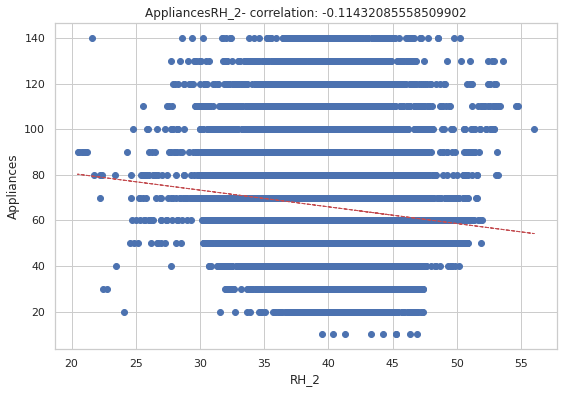

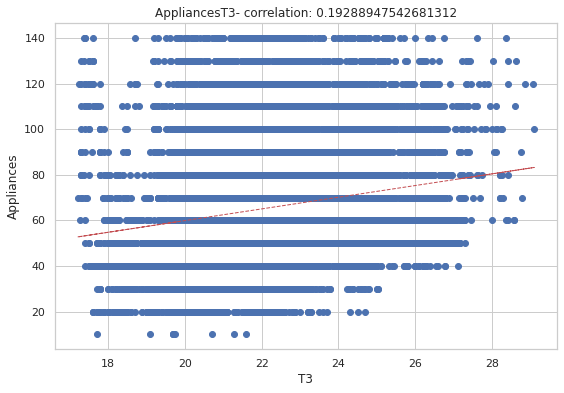

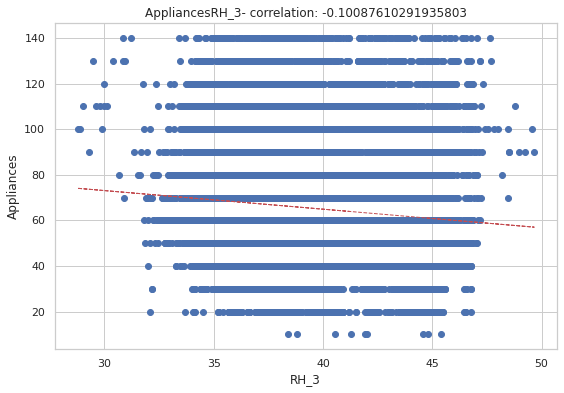

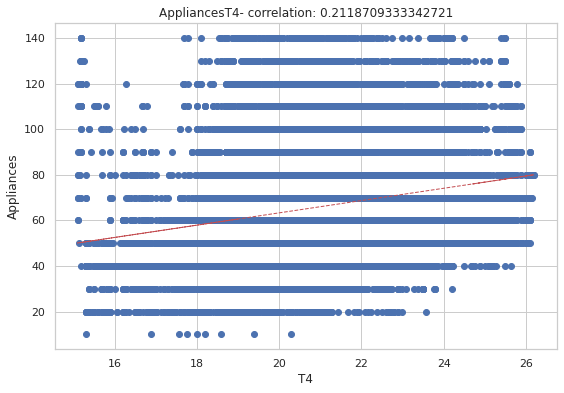

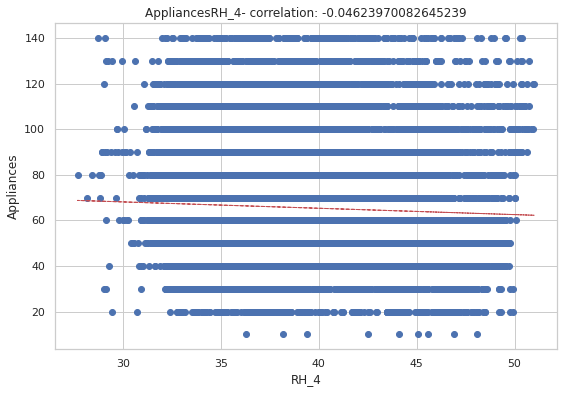

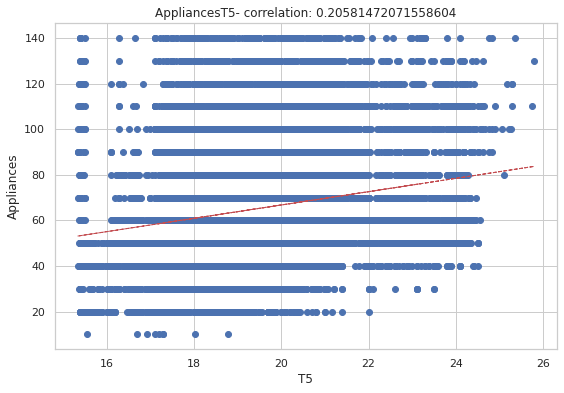

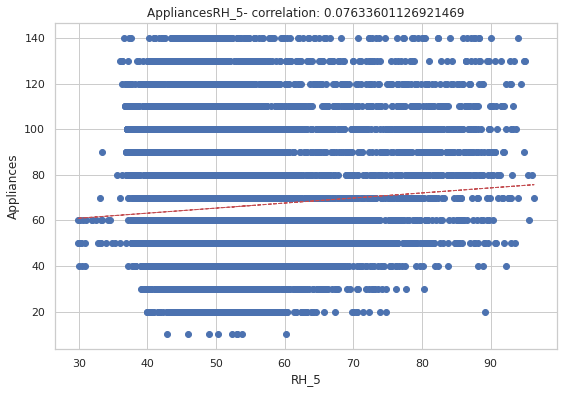

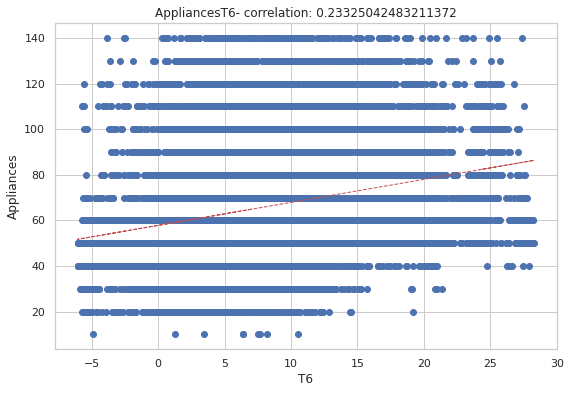

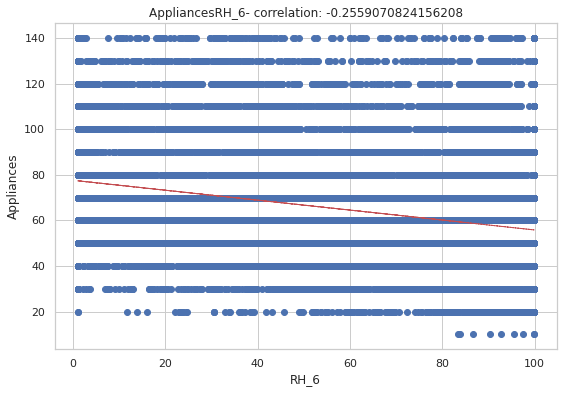

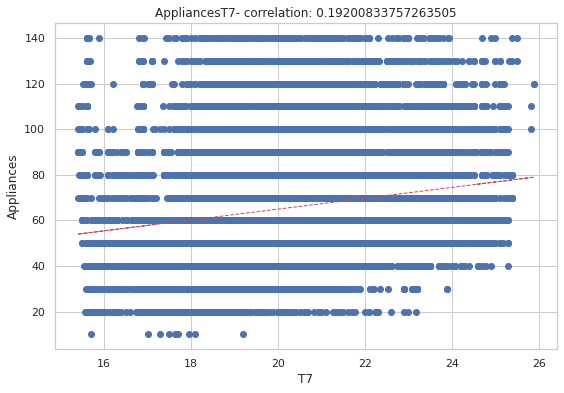

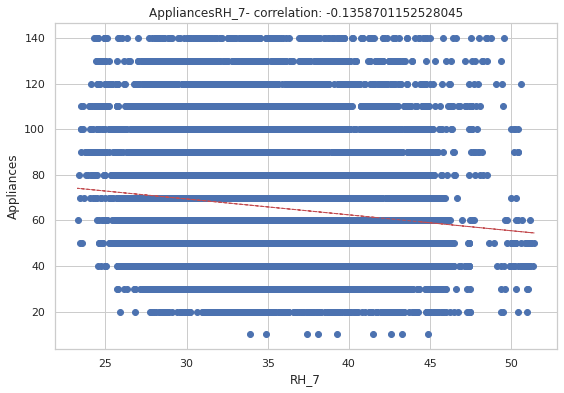

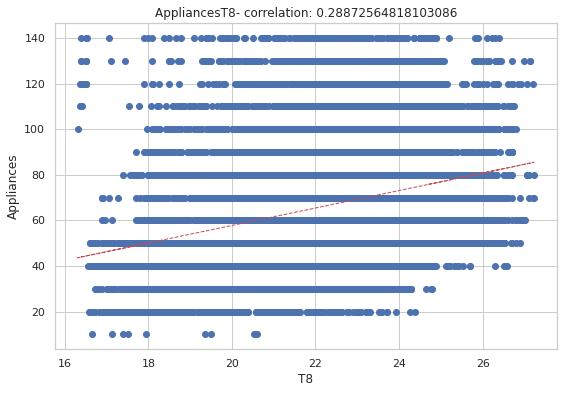

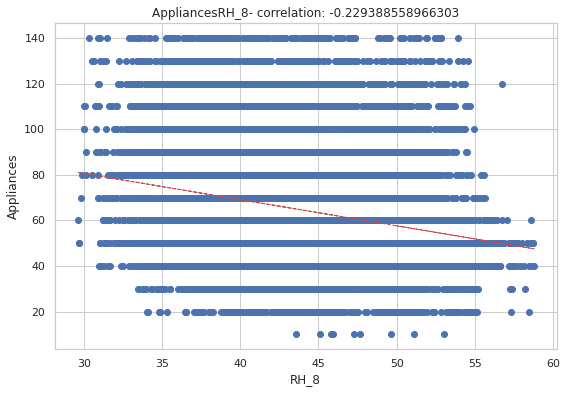

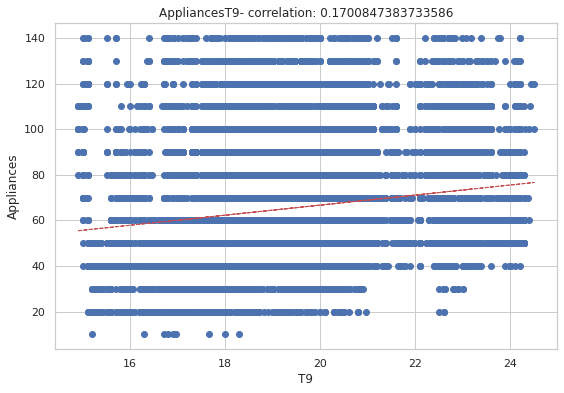

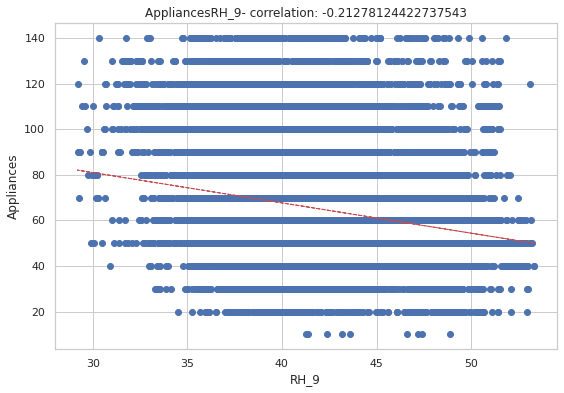

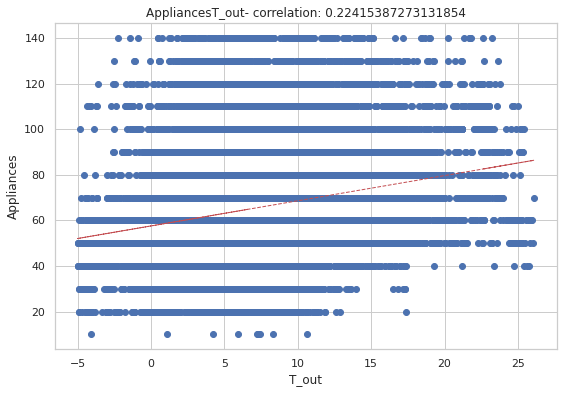

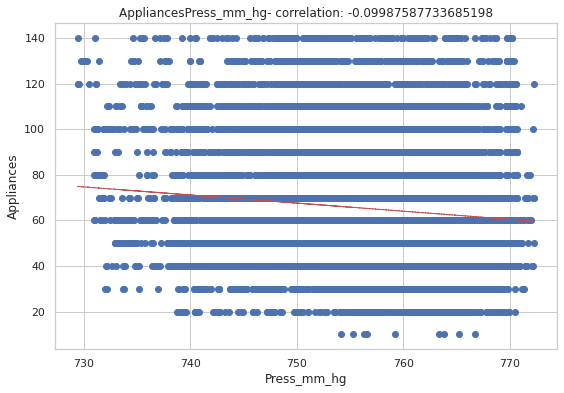

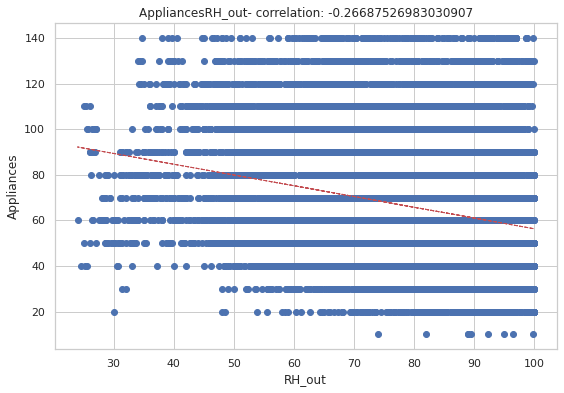

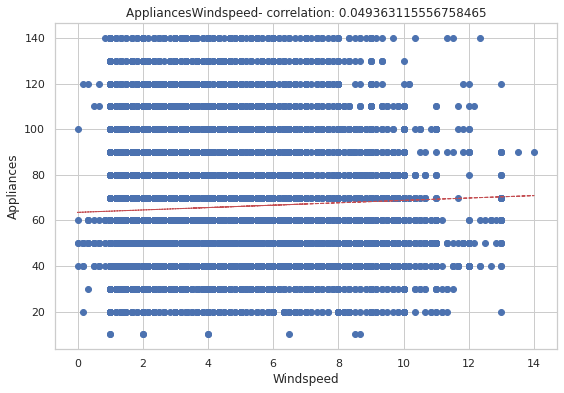

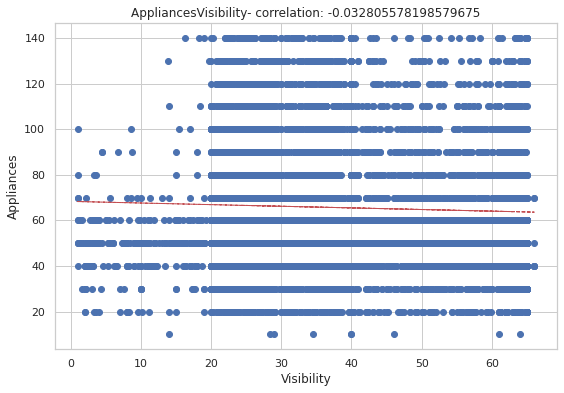

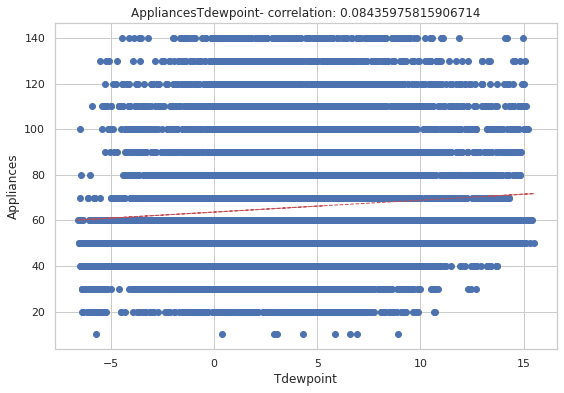

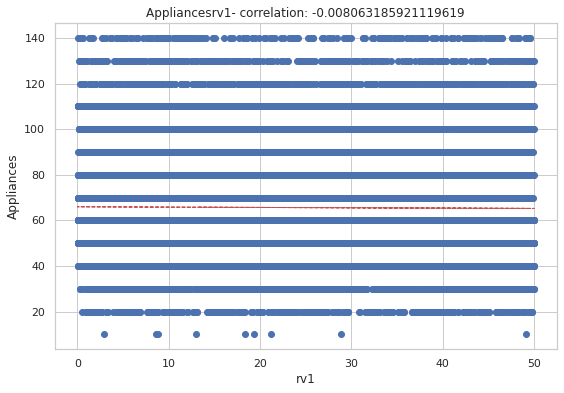

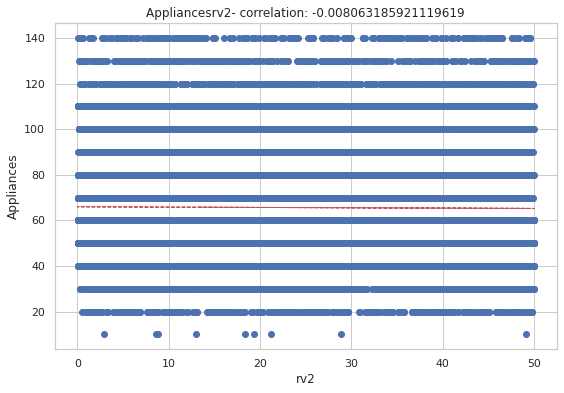

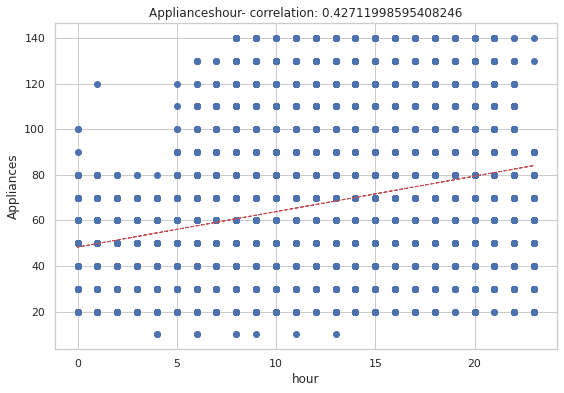

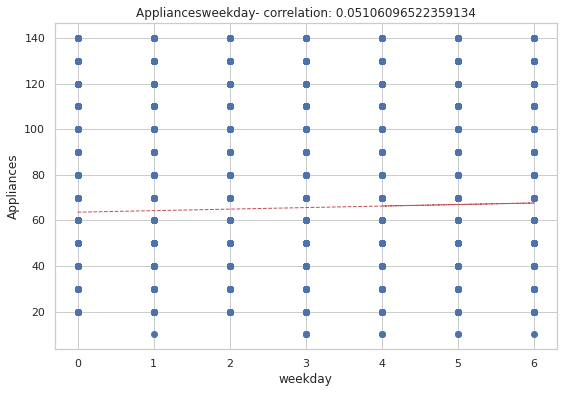

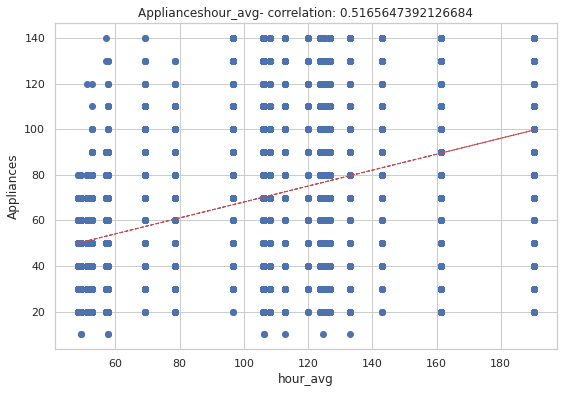

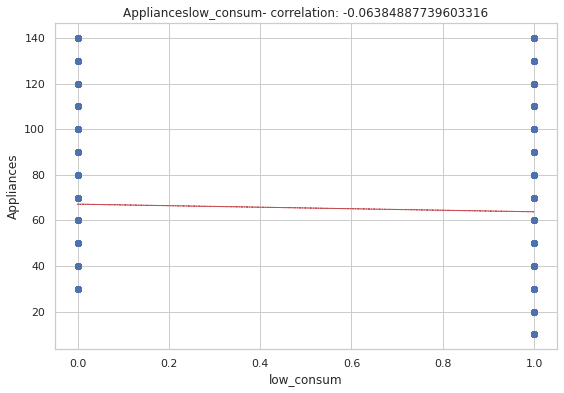

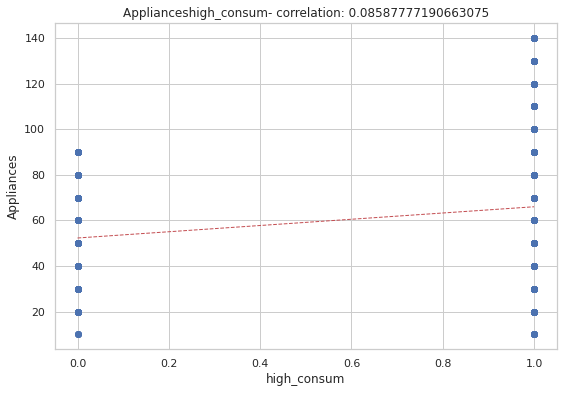

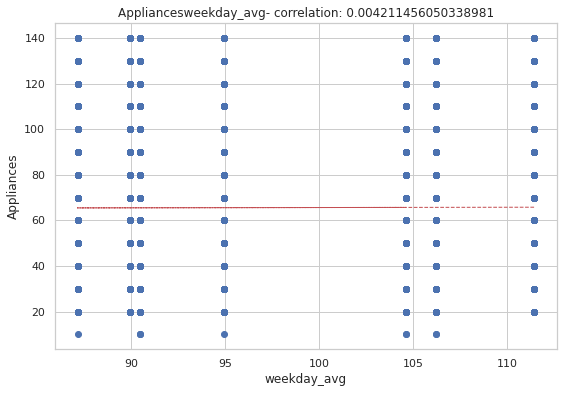

In [ ]:

# obtaining correlation plots between dependent and independent variables

numeric_features = df2.columns
for col in numeric_features[1:]:
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  feature = df2[col]
  label = df2['Appliances']
  correlation = feature.corr(label)
  plt.scatter(x=feature, y=label)
  plt.xlabel(col)
  plt.ylabel('Appliances')
  ax.set_title('Appliances' + col + '- correlation: ' + str(correlation))
  z = np.polyfit(df2[col], df2['Appliances'], 1)
  y_hat = np.poly1d(z)(df2[col])

  plt.plot(df2[col], y_hat, "r--", lw=1)

plt.show()

In [ ]:
# function to calculate Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


In [ ]:
calc_vif(df2[[i for i in df2.describe().columns if i not in ['Appliances','date']]])

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning:

divide by zero encountered in double_scalars



,variables,VIF
0,lights,1.582724
1,T1,3957.394164
2,RH_1,2208.460305
3,T2,2701.704118
4,RH_2,2496.829571
5,T3,1535.525240
6,RH_3,1945.043971
7,T4,1083.049385
8,RH_4,1491.020057
9,T5,1233.585127


In [ ]:
df2.drop(columns=['rv2'],axis=1,inplace=True)

In [ ]:
calc_vif(df2[[i for i in df2.describe().columns if i not in ['Appliances','date' ]]])

,variables,VIF
0,lights,1.582724
1,T1,3957.394164
2,RH_1,2208.460305
3,T2,2701.704118
4,RH_2,2496.829571
5,T3,1535.525240
6,RH_3,1945.043971
7,T4,1083.049385
8,RH_4,1491.020057
9,T5,1233.585127


In [ ]:
df2.drop(columns=['T1'],axis=1,inplace=True)

In [ ]:
calc_vif(df2[[i for i in df2.describe().columns if i not in ['Appliances','date']]])

,variables,VIF
0,lights,1.582462
1,RH_1,1711.131576
2,T2,1604.256132
3,RH_2,2011.853396
4,T3,1303.880944
5,RH_3,1944.810640
6,T4,1048.991817
7,RH_4,1490.591340
8,T5,1214.376019
9,RH_5,46.921428


In [ ]:
df2.drop(columns=['T9'],axis=1,inplace=True)
calc_vif(df2[[i for i in df2.describe().columns if i not in ['Appliances','date']]])

,variables,VIF
0,lights,1.551207
1,RH_1,1709.381474
2,T2,1601.484742
3,RH_2,1989.613999
4,T3,1238.943483
5,RH_3,1933.960514
6,T4,1027.556059
7,RH_4,1490.510006
8,T5,1099.734192
9,RH_5,46.594616


In [ ]:
df2.drop(columns=['Press_mm_hg'],axis=1,inplace=True)
calc_vif(df2[[i for i in df2.describe().columns if i not in ['Appliances','date']]])

,variables,VIF
0,lights,1.543344
1,RH_1,1668.209338
2,T2,1583.203862
3,RH_2,1902.697747
4,T3,1237.419894
5,RH_3,1914.941133
6,T4,1009.722151
7,RH_4,1480.356806
8,T5,1064.509044
9,RH_5,46.558121


In [ ]:
df2.drop(columns=['RH_2', 'T2','RH_1', 'RH_4', 'RH_3','T7','T5'],axis=1,inplace=True)
calc_vif(df2[[i for i in df2.describe().columns if i not in ['Appliances','date']]])

,variables,VIF
0,lights,1.475054
1,T3,947.155321
2,T4,606.683432
3,RH_5,43.418424
4,T6,69.449269
5,RH_6,34.621167
6,RH_7,367.497273
7,T8,566.924198
8,RH_8,489.751645
9,RH_9,514.526479


In [ ]:
df2.drop(columns=['T3', 'T4','RH_7', 'RH_8', 'RH_9','RH_out', 'T_out'],axis=1,inplace=True)
calc_vif(df2[[i for i in df2.describe().columns if i not in ['Appliances','date']]])

,variables,VIF
0,lights,1.376389
1,RH_5,37.809619
2,T6,19.865752
3,RH_6,12.354473
4,T8,76.258302
5,Windspeed,4.350704
6,Visibility,11.216593
7,Tdewpoint,7.355602
8,rv1,3.952312
9,hour,5.387420


In [ ]:
df2.drop(columns=['RH_5', 'T6', 'T8',],axis=1,inplace=True)
calc_vif(df2[[i for i in df2.describe().columns if i not in ['Appliances','date' ]]])

,variables,VIF
0,lights,1.353565
1,RH_6,4.707178
2,Windspeed,3.920099
3,Visibility,10.056943
4,Tdewpoint,1.950927
5,rv1,3.834941
6,hour,5.248124
7,hour_avg,14.846828
8,low_consum,3.436753
9,high_consum,14.193800


In [ ]:
df2[df2.columns[:]].corr()['Appliances'][:]

Appliances     1.000000
lights         0.289054
RH_6          -0.255907
Windspeed      0.049363
Visibility    -0.032806
Tdewpoint      0.084360
rv1           -0.008063
hour           0.427120
hour_avg       0.516565
low_consum    -0.063849
high_consum    0.085878
Name: Appliances, dtype: float64

In [ ]:
df2.drop(columns = (['hour_avg']), inplace =  True)


In [ ]:
df2.drop(columns = (['date']), inplace =  True)

In [ ]:
calc_vif(df2[[i for i in df2.describe().columns if i not in ['Appliances','date' ]]])

,variables,VIF
0,lights,1.338248
1,RH_6,4.687564
2,Windspeed,3.813718
3,Visibility,9.652418
4,Tdewpoint,1.946860
5,rv1,3.796794
6,hour,3.993686
7,low_consum,2.066587
8,high_consum,13.623267


#The above column features are the ones which remained after removing multicollinearity

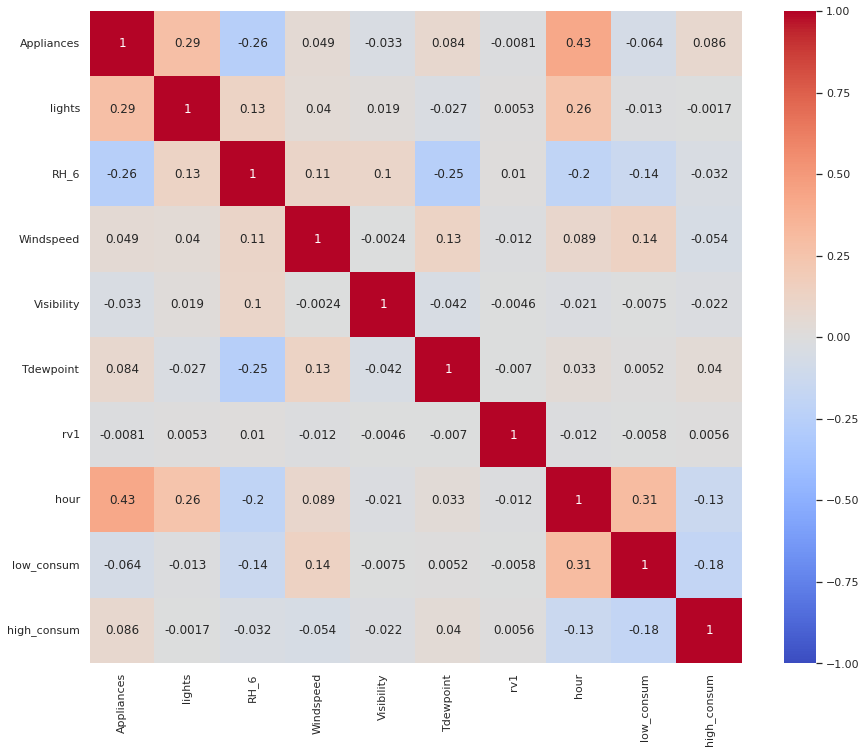

In [ ]:
#Heatmap after reducing the multicollenearity 
plt.figure(figsize=(15,12))
sns.heatmap(df2.corr('pearson'),vmin=-1, vmax=1,cmap='coolwarm',annot=True, square=True)

#### 1. Why did you pick the specific chart?

#### 2. What is/are the insight(s) found from the chart?

## Chart - 15 - Pair Plot 

#### 1. Why did you pick the specific chart?

#### 2. What is/are the insight(s) found from the chart?

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

##### Why did you choose the specific statistical test?

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

##### Why did you choose the specific statistical test?

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

##### Why did you choose the specific statistical test?

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

### 2. Handling Outliers

##### What all outlier treatment techniques have you used and why did you use those techniques?

### 3. Categorical Encoding

### 4. Feature Manipulation & Selection

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

### 6. Data Scaling

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

### 8. Data Splitting

##### What data splitting ratio have you used and why? 

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
# Creating the data of independent variables
Y = df2['Appliances']

# Create the dependent variable data
X = df2.drop(columns=['Appliances'],axis=1).values

In [ ]:
X

array([[30.        , 84.25666667,  7.        , ..., 17.        ,
         1.        ,  0.        ],
       [30.        , 84.06333333,  6.66666667, ..., 17.        ,
         1.        ,  0.        ],
       [30.        , 83.15666667,  6.33333333, ..., 17.        ,
         1.        ,  0.        ],
       ...,
       [ 0.        ,  1.        ,  3.16666667, ..., 17.        ,
         1.        ,  1.        ],
       [ 0.        ,  1.        ,  3.33333333, ..., 17.        ,
         1.        ,  1.        ],
       [ 0.        ,  1.        ,  3.5       , ..., 17.        ,
         1.        ,  1.        ]])

In [ ]:

# Splitting the dataset into the Training set and Test set

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [ ]:

# Transforming data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#Linear Regression Model

In [ ]:

# Fitting Multiple Linear Regression to the Training set

regressor = LinearRegression()
regressor.fit(X_train, Y_train)


LinearRegression()

In [ ]:

# Predicting the Train set results

Y_pred_train = regressor.predict(X_train)

In [ ]:

# Predicting the Test set results

Y_pred_test = regressor.predict(X_test)

In [ ]:

# r2 score of train set

r2_linear_train = r2_score(Y_train, Y_pred_train)

In [ ]:

r2_linear_train

0.3136984309565769

In [ ]:

r2_linear_test = r2_score(Y_test, Y_pred_test)

In [ ]:
r2_linear_test

0.32240926276747084

In [ ]:

# different metrics used

MSE  = mean_squared_error(Y_test,Y_pred_test)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2_linear_test = r2_score(Y_test,Y_pred_test)
print("R2 :" ,r2_linear_test)
print("Adjusted R2 : ",1-(1-r2_score(Y_test,Y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))


MSE : 441.51565862089655
RMSE : 21.012273999281863
R2 : 0.32240926276747084
Adjusted R2 :  0.32064112225280206


#Lasso Regression Model

In [ ]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.001 , max_iter= 3000)

lasso.fit(X_train, Y_train)

Lasso(alpha=0.001, max_iter=3000)

In [ ]:
lasso =  lasso.score(X_train, Y_train)

In [ ]:
### Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.217e+05, tolerance: 7.607e+02

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.904e+05, tolerance: 7.568e+02

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.323e+05, tolerance: 7.597e+02

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:
# getting best parameters

print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)


The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -470.6771129175243


In [ ]:

lasso  = Lasso(alpha=0.01 , max_iter= 3000)

lasso.fit(X_train, Y_train)

Lasso(alpha=0.01, max_iter=3000)

In [ ]:
Lasso =lasso.score(X_train, Y_train)

#Ridge Regression Model

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -470.72376960028106


In [ ]:
from sklearn.linear_model import Ridge
ridge  = Ridge(alpha=1 , max_iter= 3000)

ridge.fit(X_train, Y_train)

Ridge(alpha=1, max_iter=3000)

In [ ]:
ridge = ridge.score(X_train, Y_train)

#Decision Tree Regression Model

In [ ]:
# training model

from sklearn.tree import DecisionTreeRegressor
decisionTree = DecisionTreeRegressor()

param = {'max_depth' : [1,4,5,6,7,10,15,20,8]}

gridSearch_decisionTree=GridSearchCV(decisionTree,param,scoring='r2',cv=6)
gridSearch_decisionTree.fit(X_train,Y_train)


best_DecisionTree=gridSearch_decisionTree.best_estimator_
bestDecisionTree_testScore=best_DecisionTree.score(X_test,Y_test)
r2_decision_test = best_DecisionTree.score(X_test,Y_test)

In [ ]:

# extracting best parameters

print(f"The best Decision Tree R2 score is {gridSearch_decisionTree.best_score_} with max depth {gridSearch_decisionTree.best_params_['max_depth']}")
print('\n')
print(f"The best R2 test score is : {bestDecisionTree_testScore} with max depth = {gridSearch_decisionTree.best_params_['max_depth']}")


The best Decision Tree R2 score is 0.7347650045935742 with max depth 8


The best R2 test score is : 0.7334554723778516 with max depth = 8


#Random Forest Regression Model

In [ ]:
# training model

from sklearn.ensemble import RandomForestRegressor
randomForestAlgo = RandomForestRegressor()


param = {'n_estimators' : [int(x) for x in np.linspace(start=10,stop=20, num=5)], 
         'max_depth' : [10,15,20],
         'min_samples_split':[2,4],
         'min_samples_leaf':[1,2],
         'bootstrap' : [True,False]
        }

gridSearch_RandomForest=GridSearchCV(randomForestAlgo,param,scoring='r2',cv=5)
gridSearch_RandomForest.fit(X_train,Y_train)

best_randomForest=gridSearch_RandomForest.best_estimator_
bestRandomForest_testScore=best_randomForest.score(X_test,Y_test)
r2_randomforest_test = best_randomForest.score(X_test,Y_test)


In [ ]:

# getting best parameters

print(f"The best Random Forest R2 train score is : {gridSearch_RandomForest.best_score_} with n estimators = {gridSearch_RandomForest.best_params_['n_estimators']}, max depth : {gridSearch_RandomForest.best_params_['max_depth']}, min samples split : {gridSearch_RandomForest.best_params_['min_samples_split']} and min samples leaf : {gridSearch_RandomForest.best_params_['min_samples_leaf']}")
print('\n')
print(f"The best Random Forest R2 test score is : {bestRandomForest_testScore} with n estimators = {gridSearch_RandomForest.best_params_['n_estimators']}, max depth : {gridSearch_RandomForest.best_params_['max_depth']}, min samples split : {gridSearch_RandomForest.best_params_['min_samples_split']} and min samples leaf : {gridSearch_RandomForest.best_params_['min_samples_leaf']}")



The best Random Forest R2 train score is : 0.7910833331079438 with n estimators = 17, max depth : 20, min samples split : 4 and min samples leaf : 2


The best Random Forest R2 test score is : 0.7914337122686352 with n estimators = 17, max depth : 20, min samples split : 4 and min samples leaf : 2


#Extra Trees Regression Model

In [ ]:
# training model

from sklearn.ensemble import ExtraTreesRegressor
extraTreesAlgo = ExtraTreesRegressor()

param = {'n_estimators' : [int(x) for x in np.linspace(start=10,stop=20, num=5)], 
         'max_depth' : [50,80,100],
         'min_samples_split':[1,4,8],
         'min_samples_leaf':[1,2,3],
         'bootstrap' : [True,False]
        }

gridSearch_ExtraTrees=GridSearchCV(extraTreesAlgo,param,scoring='r2',cv=5)
gridSearch_ExtraTrees.fit(X_train,Y_train)

best_ExtrasTrees=gridSearch_ExtraTrees.best_estimator_
bestExtrasTrees_testScore=best_ExtrasTrees.score(X_test,Y_test)
r2_extratree_test = best_ExtrasTrees.score(X_test,Y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


450 fits failed out of a total of 1350.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
225 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.p

In [ ]:

# getting best parameters

print(f"The best Extra Trees R2 score is : {gridSearch_ExtraTrees.best_score_} with n estimators = {gridSearch_ExtraTrees.best_params_['n_estimators']}, max depth : {gridSearch_ExtraTrees.best_params_['max_depth']}, min samples split : {gridSearch_ExtraTrees.best_params_['min_samples_split']} and min samples leaf : {gridSearch_ExtraTrees.best_params_['min_samples_leaf']}")
print('\n')
print(f"The best Extra Trees R2 test score is : {bestExtrasTrees_testScore} with n estimators = {gridSearch_ExtraTrees.best_params_['n_estimators']}, max depth : {gridSearch_ExtraTrees.best_params_['max_depth']}, min samples split : {gridSearch_ExtraTrees.best_params_['min_samples_split']} and min samples leaf : {gridSearch_ExtraTrees.best_params_['min_samples_leaf']}")


     

The best Extra Trees R2 score is : 0.7951614766241798 with n estimators = 20, max depth : 80, min samples split : 8 and min samples leaf : 1


The best Extra Trees R2 test score is : 0.7986211263524876 with n estimators = 20, max depth : 80, min samples split : 8 and min samples leaf : 1


#XGBoost Regresion Model

In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)
xgb_grid.fit(X_train,
         Y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)
r2_XGBoost_test = xgb_grid.best_score_


Fitting 2 folds for each of 9 candidates, totalling 18 fits
0.7678743399927846
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [ ]:

# creating a list of all model names
model_list = ['Linear Regression','Lasso Regression','Ridge Regression','Decision Tree Regressor','Random Forest Regressor','Extra Trees Regressor', 'XGBoost Regressor']


In [ ]:

# creating a list of all model r2 score results from above

result_list = [r2_linear_test,Lasso,ridge,r2_decision_test,r2_randomforest_test,r2_extratree_test, r2_XGBoost_test]


In [ ]:

# creating an empty dataframe

results_df = pd.DataFrame()



In [ ]:

# adding above lists to the empty dataframe

results_df['model name'] = model_list
results_df['R2-score'] = result_list



In [ ]:
# dataframe containing results from all the above models used

results_df


,model name,R2-score
0,Linear Regression,0.322409
1,Lasso Regression,0.313676
2,Ridge Regression,0.313698
3,Decision Tree Regressor,0.733455
4,Random Forest Regressor,0.791434
5,Extra Trees Regressor,0.798621
6,XGBoost Regressor,0.767874


# **Conclusion**

#Conclusion from EDA

● On average, the household energy appliances usage was at its peak during the 18th hour of the day.

● The warmest temperatures are the laundry room(T3), teenager room(T8) and kitchen area(T1) respectively. And the coldest rooms are bathroom(T5) and parents room(T9) 

● The energy usage stays consistent from temperatures 5° to 25°. At extreme high and low temperatures, the energy usage is relatively low 

● There is little to no correlation between pressure and energy consumption 

● The humidity is at its highest outside the building(RH_out) and lowest in the ironing room(RH_7) 

● In Feb, Mar, April, the usage of appliances is more or less equal and that of Jan was the lowest one 

● At week 14 i.e, the second week of April, the usage of appliances is the highest and on the other hand, its lowest in the last week of the period i.e, the fourth week of May

# Conclusion from Machine Learning

1.From the above results dataframe, the Extra Tres Regressor model is the best model with accuracy of 80% for this dataset.

2.Decision Tree Regressor had an accuracy of less than 73% which is not desirable.

3.Feature Engineering really helped us reach this accuracy.

4.We have extracted sensible and appropriate information using Exploratory Data Analysis.